In [16]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
paragraph = """Cricket is a bat-and-ball game played between two teams of eleven players each.
It is a game rich in tradition and filled with excitement, where teams compete to outscore each other.
Great players like Virat Kohli, Sachin Tendulkar, and M.S. Dhoni have become legends.
Fans enjoy thrilling moments, unforgettable centuries, and historic victories."""

# 1-1
paragraph_lower = paragraph.lower()
paragraph_clean = re.sub(r'[^\w\s]', '', paragraph_lower)
print("Clean Paragraph:\n", paragraph_clean)

Clean Paragraph:
 cricket is a batandball game played between two teams of eleven players each 
it is a game rich in tradition and filled with excitement where teams compete to outscore each other 
great players like virat kohli sachin tendulkar and ms dhoni have become legends 
fans enjoy thrilling moments unforgettable centuries and historic victories


In [18]:
# 1-2
nltk.download('punkt_tab')
words_tokenized = word_tokenize(paragraph_clean)
sentences_tokenized = sent_tokenize(paragraph)

print("\nWords using word_tokenize():", words_tokenized)
print("\nSentences:", sentences_tokenized)


Words using word_tokenize(): ['cricket', 'is', 'a', 'batandball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'it', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'great', 'players', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'and', 'ms', 'dhoni', 'have', 'become', 'legends', 'fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'and', 'historic', 'victories']

Sentences: ['Cricket is a bat-and-ball game played between two teams of eleven players each.', 'It is a game rich in tradition and filled with excitement, where teams compete to outscore each other.', 'Great players like Virat Kohli, Sachin Tendulkar, and M.S.', 'Dhoni have become legends.', 'Fans enjoy thrilling moments, unforgettable centuries, and historic victories.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
# 1-3
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]
print("\nFiltered Words:", filtered_words)


Filtered Words: ['cricket', 'batandball', 'game', 'played', 'two', 'teams', 'eleven', 'players', 'game', 'rich', 'tradition', 'filled', 'excitement', 'teams', 'compete', 'outscore', 'great', 'players', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'ms', 'dhoni', 'become', 'legends', 'fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'historic', 'victories']



Word Frequencies:
cricket: 1
batandball: 1
game: 2
played: 1
two: 1
teams: 2
eleven: 1
players: 2
rich: 1
tradition: 1
filled: 1
excitement: 1
compete: 1
outscore: 1
great: 1
like: 1
virat: 1
kohli: 1
sachin: 1
tendulkar: 1
ms: 1
dhoni: 1
become: 1
legends: 1
fans: 1
enjoy: 1
thrilling: 1
moments: 1
unforgettable: 1
centuries: 1
historic: 1
victories: 1


<Axes: xlabel='Samples', ylabel='Counts'>

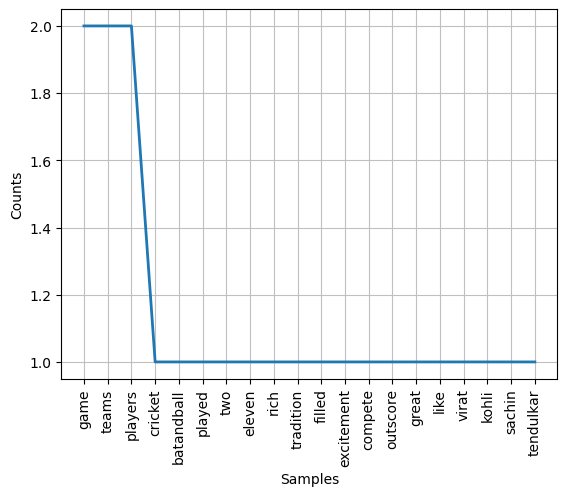

In [20]:
# 1-4
fdist = nltk.FreqDist(filtered_words)
print("\nWord Frequencies:")
for word, freq in fdist.items():
    print(f"{word}: {freq}")

fdist.plot(20)

In [21]:
# 2
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming
porter_stemmed = [porter.stem(word) for word in filtered_words]
lancaster_stemmed = [lancaster.stem(word) for word in filtered_words]

# Lemmatization
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

print("\nPorter Stemmed Words:", porter_stemmed)
print("\nLancaster Stemmed Words:", lancaster_stemmed)
print("\nLemmatized Words:", lemmatized)


Porter Stemmed Words: ['cricket', 'batandbal', 'game', 'play', 'two', 'team', 'eleven', 'player', 'game', 'rich', 'tradit', 'fill', 'excit', 'team', 'compet', 'outscor', 'great', 'player', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'ms', 'dhoni', 'becom', 'legend', 'fan', 'enjoy', 'thrill', 'moment', 'unforgett', 'centuri', 'histor', 'victori']

Lancaster Stemmed Words: ['cricket', 'batandbal', 'gam', 'play', 'two', 'team', 'elev', 'play', 'gam', 'rich', 'tradit', 'fil', 'excit', 'team', 'compet', 'outsc', 'gre', 'play', 'lik', 'vir', 'kohl', 'sachin', 'tendulk', 'ms', 'dhon', 'becom', 'legend', 'fan', 'enjoy', 'thrilling', 'mom', 'unforget', 'century', 'hist', 'vict']

Lemmatized Words: ['cricket', 'batandball', 'game', 'played', 'two', 'team', 'eleven', 'player', 'game', 'rich', 'tradition', 'filled', 'excitement', 'team', 'compete', 'outscore', 'great', 'player', 'like', 'virat', 'kohli', 'sachin', 'tendulkar', 'm', 'dhoni', 'become', 'legend', 'fan', 'enjoy', 'thrilling', 'm

In [22]:
# 3
long_words = re.findall(r'\b\w{6,}\b', paragraph)
print("\nWords with more than 5 letters:", long_words)

numbers = re.findall(r'\b\d+\b', paragraph)
print("\nNumbers found:", numbers)

capitalized_words = re.findall(r'\b[A-Z][a-z]+\b', paragraph)
print("\nCapitalized words:", capitalized_words)

only_alpha_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)
print("\nOnly alphabet words:", only_alpha_words)

vowel_words = [word for word in only_alpha_words if word[0] in 'aeiou']
print("\nWords starting with vowels:", vowel_words)



Words with more than 5 letters: ['Cricket', 'played', 'between', 'eleven', 'players', 'tradition', 'filled', 'excitement', 'compete', 'outscore', 'players', 'Sachin', 'Tendulkar', 'become', 'legends', 'thrilling', 'moments', 'unforgettable', 'centuries', 'historic', 'victories']

Numbers found: []

Capitalized words: ['Cricket', 'It', 'Great', 'Virat', 'Kohli', 'Sachin', 'Tendulkar', 'Dhoni', 'Fans']

Only alphabet words: ['Cricket', 'is', 'a', 'bat', 'and', 'ball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'It', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'Great', 'players', 'like', 'Virat', 'Kohli', 'Sachin', 'Tendulkar', 'and', 'M', 'S', 'Dhoni', 'have', 'become', 'legends', 'Fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'and', 'historic', 'victories']

Words starting with vowels: ['is', 'a', 'and', 'of', 'eleven', 'e

In [ ]:
# 4
def custom_tokenizer(text):
    text = re.sub(r'[^\w\s\'\-\.]', '', text)
    tokens = re.findall(r'\b\w[\w\-\']*\b', text)
    return tokens

custom_tokens = custom_tokenizer(paragraph)
print("\nCustom Tokens:", custom_tokens)

sample_text = "Contact me at akshanshvij@gmail.com or visit https://abc.com. Call +91 7528810999."

email_sub = re.sub(r'\S+@\S+', '<EMAIL>', sample_text)
url_sub = re.sub(r'http\S+', '<URL>', email_sub)
phone_sub = re.sub(r'(\+?\d{1,3}\s?\d{10})|(\d{3}\-\d{3}\-\d{4})', '<PHONE>', url_sub)

print("\nText after cleaning:", phone_sub)


Custom Tokens: ['Cricket', 'is', 'a', 'bat-and-ball', 'game', 'played', 'between', 'two', 'teams', 'of', 'eleven', 'players', 'each', 'It', 'is', 'a', 'game', 'rich', 'in', 'tradition', 'and', 'filled', 'with', 'excitement', 'where', 'teams', 'compete', 'to', 'outscore', 'each', 'other', 'Great', 'players', 'like', 'Virat', 'Kohli', 'Sachin', 'Tendulkar', 'and', 'M', 'S', 'Dhoni', 'have', 'become', 'legends', 'Fans', 'enjoy', 'thrilling', 'moments', 'unforgettable', 'centuries', 'and', 'historic', 'victories']

Text after cleaning: Contact me at <EMAIL> or visit <URL> Call <PHONE>.
